<a href="https://colab.research.google.com/github/AnthonyHackney888/Personal-Projects/blob/master/TopologicalPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#!pip install scikit-tda
#!pip install teaspoon

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspace
import networkx as nx
import ripser
import persim

import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw
from teaspoon.SP.network import ordinal_partition_graph
from teaspoon.TDA.PHN import PH_network
from teaspoon.SP.network_tools import make_network
from teaspoon.parameter_selection.MsPE import MsPE_tau
import teaspoon.MakeData.DynSysLib.DynSysLib as DSL


[[ 9.71771336e-02 -1.83797909e+00]
 [-8.73098201e-01  1.10560290e+00]
 [ 9.81633779e-01  1.66798176e+00]
 [ 1.90454134e+00  2.26440566e-01]
 [-1.01958414e+00  1.65614710e+00]
 [ 7.44838994e-02  1.36557234e+00]
 [ 1.16404157e+00 -1.42929024e+00]
 [-1.47419407e+00 -1.16785917e+00]
 [ 1.05381119e+00 -1.28093917e+00]
 [ 1.21380165e+00  4.13773317e-01]
 [ 1.36929175e+00 -4.80233456e-01]
 [ 7.96348286e-01  1.15256018e+00]
 [ 1.60718049e+00 -2.36770975e-01]
 [-3.08443214e-01 -1.08095052e+00]
 [ 7.48754334e-01  1.58291154e+00]
 [ 1.71056111e+00  3.88041594e-01]
 [-5.90406935e-01 -1.55538344e+00]
 [ 1.46891752e+00  1.16873562e+00]
 [ 1.31724177e-01 -1.70448618e+00]
 [-5.58763814e-01 -1.89022998e+00]
 [ 1.06019983e+00 -5.66501221e-01]
 [-1.17558046e+00 -9.38950561e-01]
 [-1.02256117e+00  1.31850005e+00]
 [-1.14696982e-01 -1.12805027e+00]
 [ 4.46739398e-01 -1.92903894e+00]
 [-1.38614633e+00  2.06428360e-01]
 [-1.91429611e+00 -6.53636594e-02]
 [ 5.82073224e-01 -1.64037161e+00]
 [-1.59049381e+00 -6

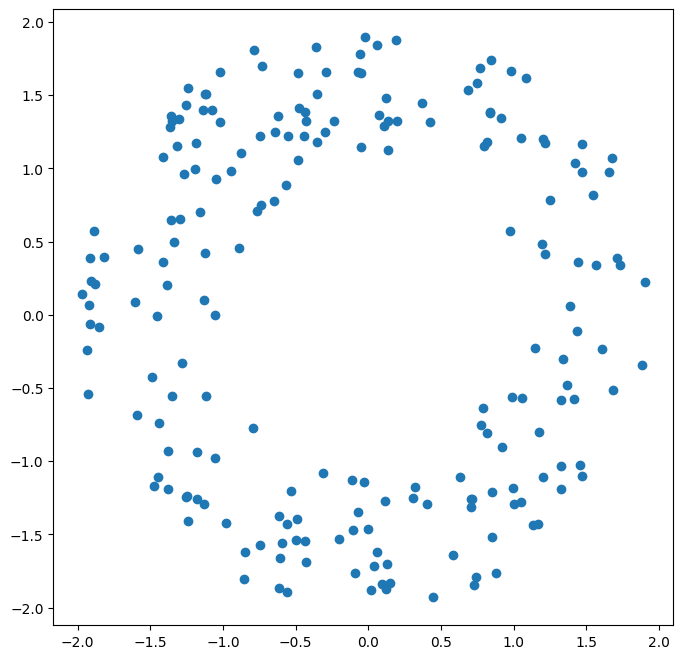

In [58]:
r = 1
R = 2
P = makePtCloud.Annulus(N=200,r=r,R=R,seed=None)# teaspoon data generation
plt.scatter(P[:,0],P[:,1])
print(P)
print(type(P))
print(P.shape)

In [59]:
from IPython.core.pylabtools import figsize
def darwTDAtutorial(P,diagrams,R=2):
  fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

  #draw point cloud
  plt.sca(axes[0])
  plt.title('Point Cloud')
  plt.scatter(P[:,0],P[:,1])

  #draw digrams
  plt.sca(axes[1])
  plt.title('0-dim diagram')
  Draw.drawDgm(diagrams[0])

  plt.sca(axes[2])
  plt.title('1-dim diagram')
  Draw.drawDgm(diagrams[1])
  plt.axis([0,R,0,R])

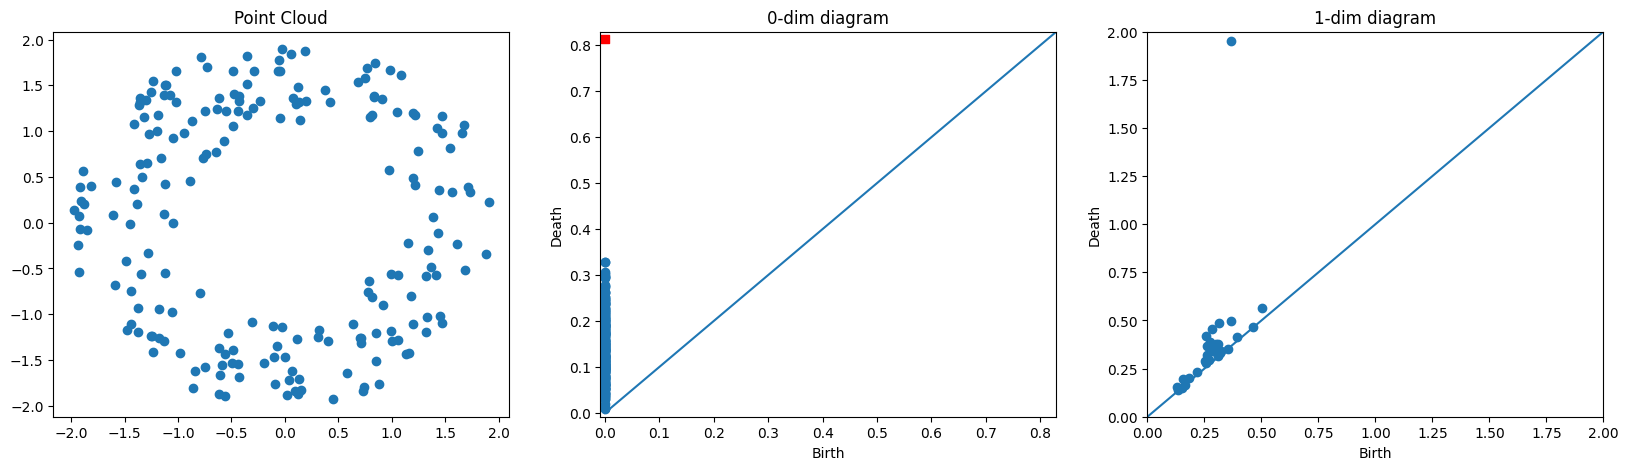

In [60]:
diagrams = ripser.ripser(P)['dgms']

#draw
darwTDAtutorial(P,diagrams)

In [61]:
data = ripser.ripser(P)
print(data.keys())
print(data['dgms'])
data['dgms'][1]
len(data['dgms'])

dict_keys(['dgms', 'cocycles', 'num_edges', 'dperm2all', 'idx_perm', 'r_cover'])
[array([[0.        , 0.00938433],
       [0.        , 0.01006294],
       [0.        , 0.01055384],
       [0.        , 0.01079251],
       [0.        , 0.01903258],
       [0.        , 0.03038187],
       [0.        , 0.03051304],
       [0.        , 0.03410274],
       [0.        , 0.03637892],
       [0.        , 0.03730115],
       [0.        , 0.04047785],
       [0.        , 0.04064379],
       [0.        , 0.04312059],
       [0.        , 0.04391705],
       [0.        , 0.04863238],
       [0.        , 0.05219846],
       [0.        , 0.05288028],
       [0.        , 0.05290282],
       [0.        , 0.05323986],
       [0.        , 0.05409152],
       [0.        , 0.05452042],
       [0.        , 0.0580525 ],
       [0.        , 0.06010834],
       [0.        , 0.06054685],
       [0.        , 0.06104086],
       [0.        , 0.06169784],
       [0.        , 0.06273915],
       [0.        , 0.06386

2

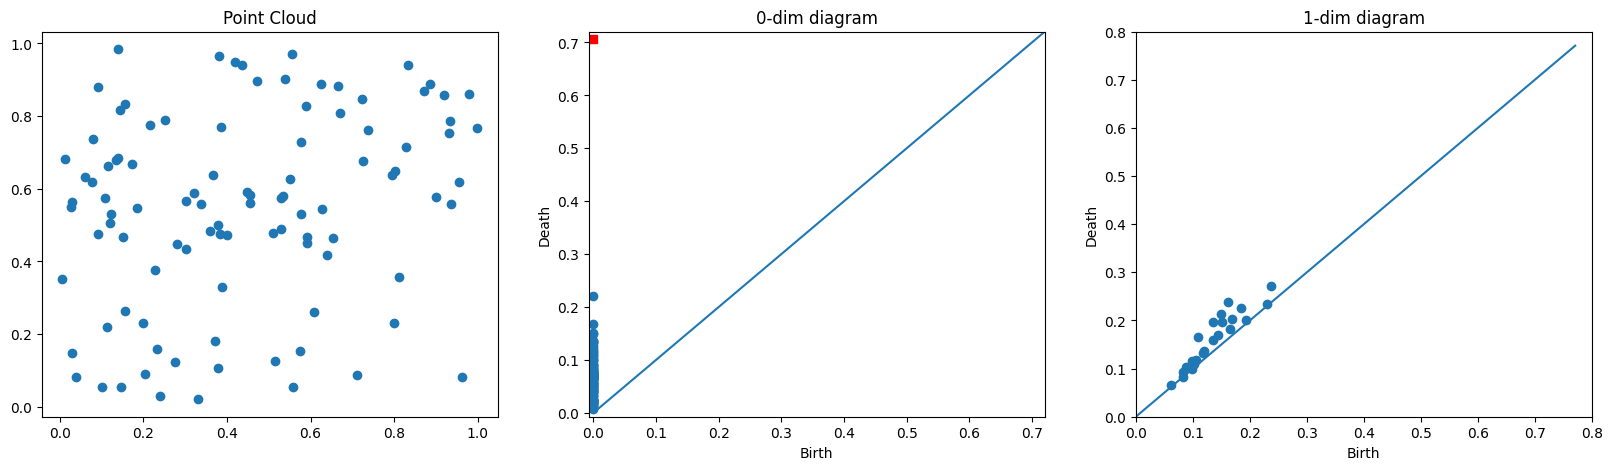

In [62]:
P = makePtCloud.Cube()
diagrams = ripser.ripser(P)['dgms']

#draw stuff
darwTDAtutorial(P,diagrams,R=0.8)

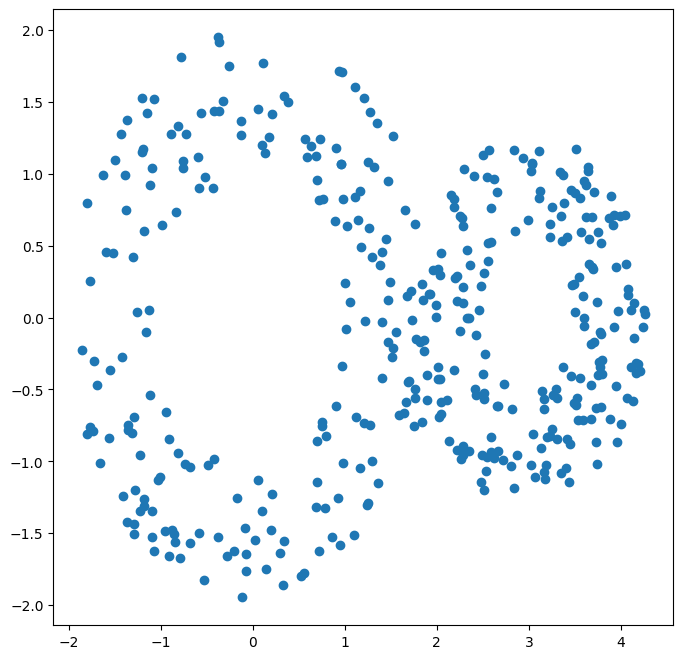

In [63]:
#make quick double annulus
def DoubleAnnulus(r1 = 1, R1 = 2,r2 = .8, R2 = 1.3, xshift = 3):
  P = makePtCloud.Annulus(r = r1, R = R1)
  Q = makePtCloud.Annulus(r = r2, R = R2)
  Q[:,0] = Q[:,0] +xshift
  P = np.concatenate((P,Q))
  return(P)
P = DoubleAnnulus(r1 = 1, R1 = 2,r2 = .5, R2 = 1.3,xshift = 3)
plt.scatter(P[:,0],P[:,1])

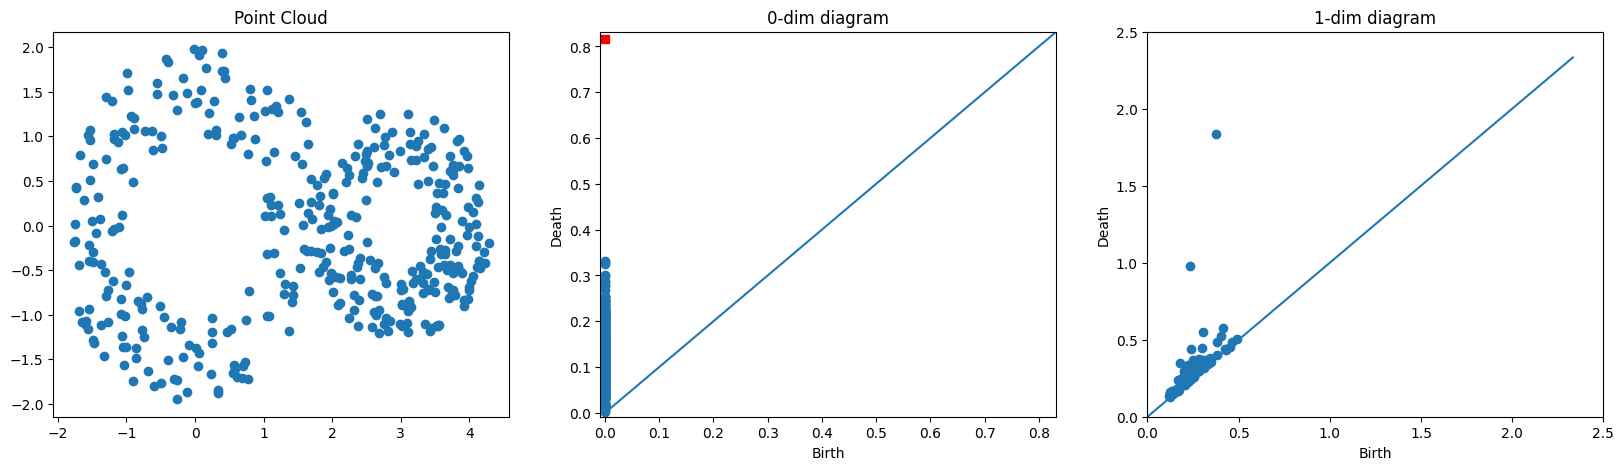

In [64]:
P = DoubleAnnulus(r1 = 1, R1 = 2, r2 = .5, R2 = 1.3, xshift = 3)
diagrams = ripser.ripser(P)['dgms']

#drawthings
darwTDAtutorial(P,diagrams,R=2.5)

In [65]:
D = np.array([[0,1,np.inf,np.inf,6], [0,0,5,np.inf,np.inf],[0,0,0,2,4],[0,0,0,0,3],[0,0,0,0,0]])
D=D+D.T
print(D)

[[ 0.  1. inf inf  6.]
 [ 1.  0.  5. inf inf]
 [inf  5.  0.  2.  4.]
 [inf inf  2.  0.  3.]
 [ 6. inf  4.  3.  0.]]


In [66]:
diagrams = ripser.ripser(D,distance_matrix = True, maxdim=1)['dgms']
print('0-Dim Diagram')
print(diagrams[0])
print('1-Dim Diagram')
print(diagrams[1])

0-Dim Diagram
[[ 0.  1.]
 [ 0.  2.]
 [ 0.  3.]
 [ 0.  5.]
 [ 0. inf]]
1-Dim Diagram
[[ 6. inf]]


In [67]:
def drawGraphEx(G):
  pos = nx.spring_layout(G)

  nx.draw_networkx_nodes(G,pos,node_size=70)

  nx.draw_networkx_edges(G,pos,width=2)

  edge_labels=nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'weight'))



There are 11 edges


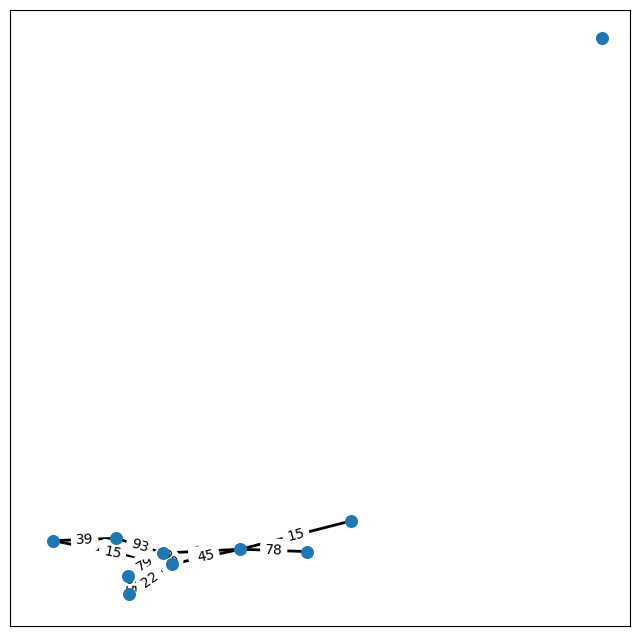

In [68]:
n = 10
p = .3

G = nx.erdos_renyi_graph(n,p,seed=None,directed=False)
m = len(G.edges)
print('There are',m,'edges')
maxWeight = 100
weights = np.random.randint(maxWeight,size = m)
for i,e in enumerate(G.edges()):
  G[e[0]][e[1]] ['weight'] = weights[i]

drawGraphEx(G)

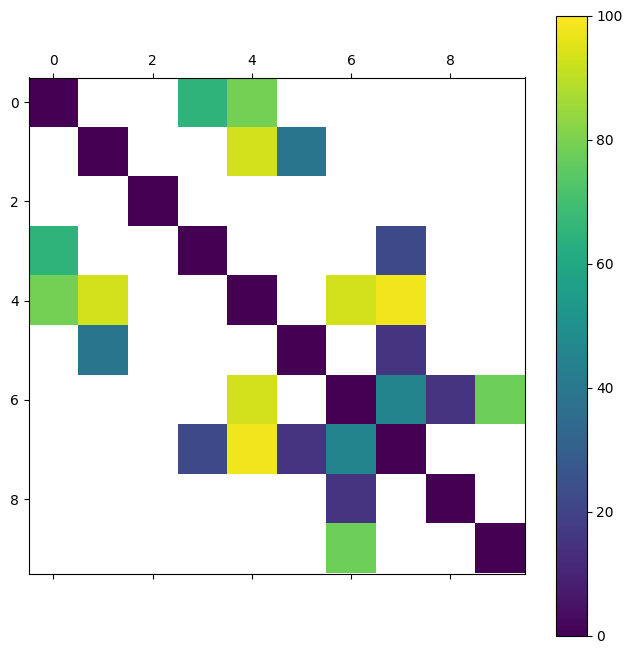

In [69]:
A = nx.adjacency_matrix(G,weight = "weight")
A = A.todense()
A = np.array(A)
A = A.astype('float64')
A[np.where(A==0)] = np.inf
np.fill_diagonal(A,0)

im = plt.matshow(A,vmax = 100)
plt.colorbar(im)

[array([[ 0., 15.],
       [ 0., 15.],
       [ 0., 22.],
       [ 0., 39.],
       [ 0., 45.],
       [ 0., 65.],
       [ 0., 78.],
       [ 0., 79.],
       [ 0., inf],
       [ 0., inf]]), array([[93., inf],
       [93., inf]])]


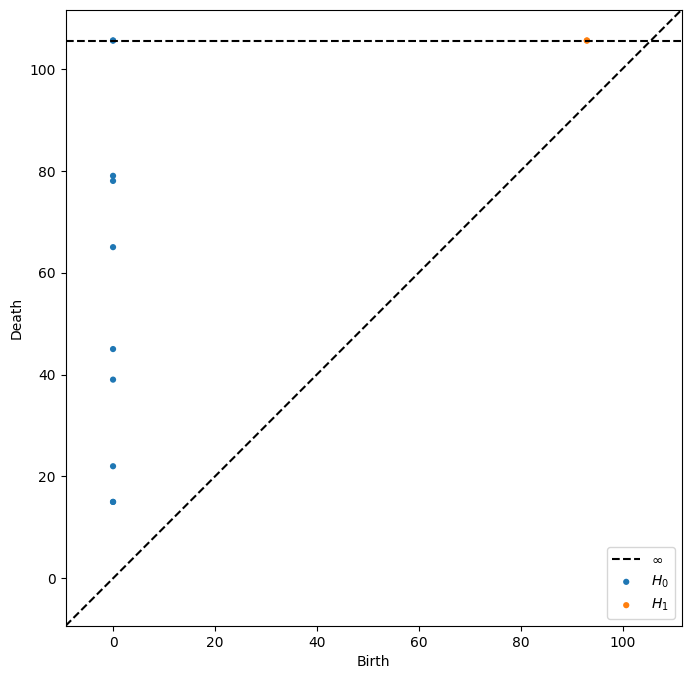

In [70]:
diagrams = ripser.ripser(A,distance_matrix=True)['dgms']
persim.plot_diagrams(diagrams)
print(diagrams)

In [71]:
def drawNetworkExamples(gs,G,diagram):
  TextSize=14
  plt.figure(2)
  plt.figure(figsize(8,8))
  gs = gridspace.GridSpec(4,2)

  ax = plt.subplot(gs[0:2,0:2])
  plt.title('Time Series',size = TextSize)
  plt.plot(ts,'K')
  plt.xticks(size = TextSize)
  plt.yticks(size=TextSize)
  plt.xlabel('$t$',size = TextSize)
  plt.ylabel('$x(t)$', size = TextSize)
  plt.xlim(0,len(ts))

  ax = plt.subplot(gs[2:4,0])
  plt.title('Network', size = TextSize)
  nx.draw(G,pos,with_labels=False,font_weight = 'bold',node_color='blue',width=1,font_size=10,node_size=30)

  ax = plt.subplot(gs[2:4, 1])
  plt.title('Persistence Diagram',size = TextSize)
  MS = 3
  top = max(diagram[1].T[1])
  plt.plot([0,top*1.25],[0,top*1.25],'k--')
  plt.yticks(size = TextSize)
  plt.xticks(size = TextSize)
  plt.xlabel('Birth',size = TextSize)
  plt.ylabel('Death',size = TextSize)
  plt.plot(diagram[1].T[0],diagram[1].T[1],'go',markersize = MS+2)
  plt.xlim(0,top*1.25)
  plt.ylim(0,top*1.25)
  plt.subplots_adjust(hspace=0.8)
  plt.subplots_adjust(wspace=0.35)
  plt.show()

def drawThisDiagram(diagram):
  TextSize = 14
  plt.title('Persistence Diagram', size = TextSize)
  MS = 3
  top = max(diagram[1].T[1])
  plt.plot([0,top*1.25],[0,top*1.25],'k--')
  plt.yticks(size = TextSize)
  plt.xticks(size = TextSize)
  plt.xlabel('Birth', size = TextSize)
  plt.ylabel('Death', size = TextSize)
  plt.plot(diagram[1].T[0],diagram[1].T[1] ,'go', markersize = MS+2)
  plt.xlim(0,top*1.25)
  plt.ylim(0,top*1.25)



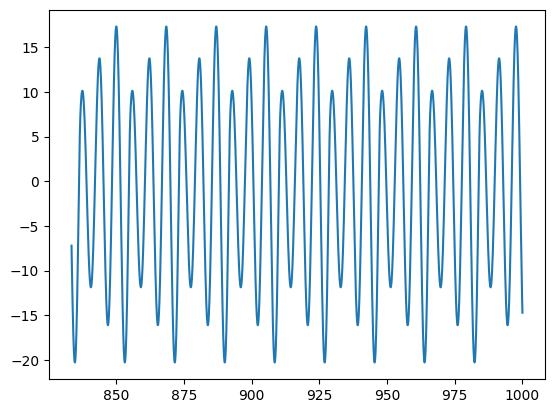

In [72]:
system = 'rossler'
dynamic_state = 'periodic'
t, solution = DSL.DynamicSystems(system, dynamic_state)
ts = solution[1]

plt.plot(t,ts)

In [73]:
#!pip install pyentrp

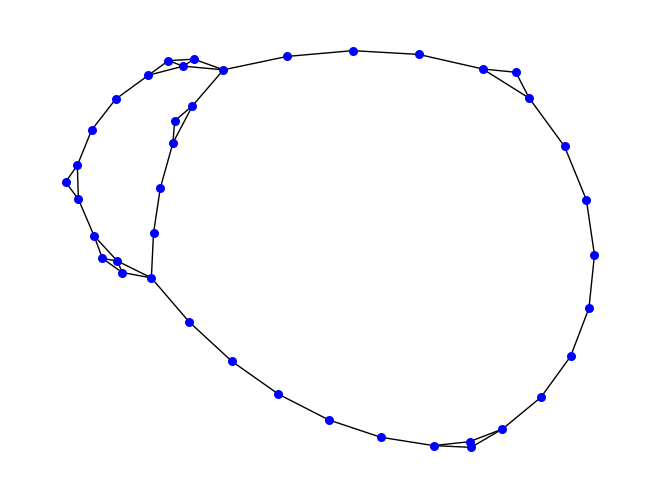

In [74]:
tau = int(MsPE_tau(ts))
n = 5

A = ordinal_partition_graph(ts,n,tau)

G, pos = make_network(A, position_iterations  = 2000, remove_deg_zero_nodes = True)

nx.draw(G,pos,with_labels=False, font_weight='bold', node_color='blue',width=1, font_size= 10, node_size=30)

1-D Persistent Homology(loops: 
 [[1. 9.]
 [1. 2.]
 [1. 5.]]


<Figure size 640x480 with 0 Axes>

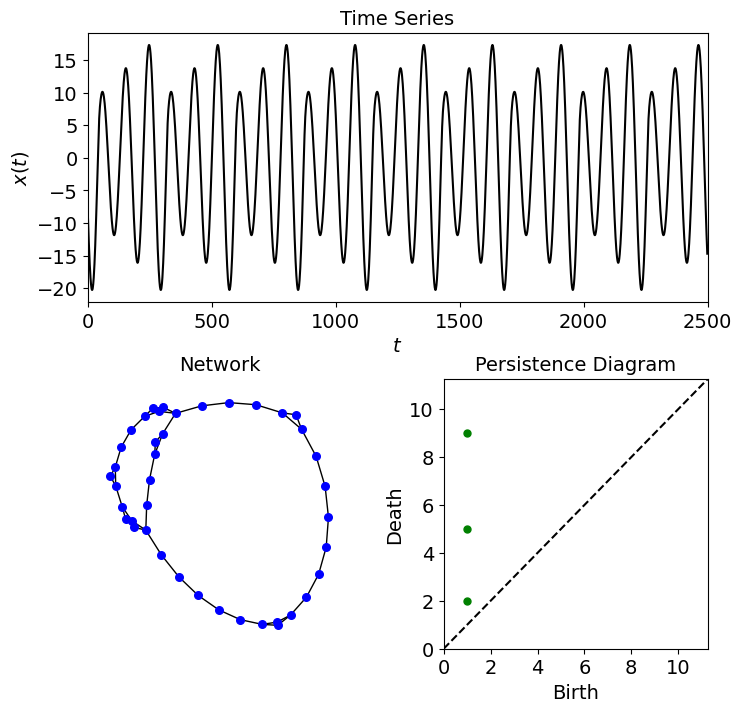

In [75]:
#create the distance matrix
D, diagram = PH_network(A,method = 'unweighted', distance = 'shortest_path')
print('1-D Persistent Homology(loops: \n', diagram[1])
drawNetworkExamples(ts,G,diagram)

In [76]:
#generate time series
system = 'rossler'
dynamic_state = 'chaotic'
t, solution = DSL.DynamicSystems(system, dynamic_state)
ts = solution[1]

#Get appropriate dimension and delay paremeters for permutations
tau - int(MsPE_tau(ts))
n = 5

#create adjacency matrix, this
A = ordinal_partition_graph(ts,n,tau)

#get networks representation of network for plotting
G, pos = make_network(A, position_iterations = 2000, remove_deg_zero_nodes=True)

#Create distance matrix and calculate persistence diagram
D,diagram = PH_network(A, method = 'unweighted',distance = 'shortest_path' )
print('1-D Persistent Homology(loops: \n', diagram[1])

1-D Persistent Homology(loops: 
 [[1. 9.]
 [1. 6.]]


<Figure size 800x800 with 0 Axes>

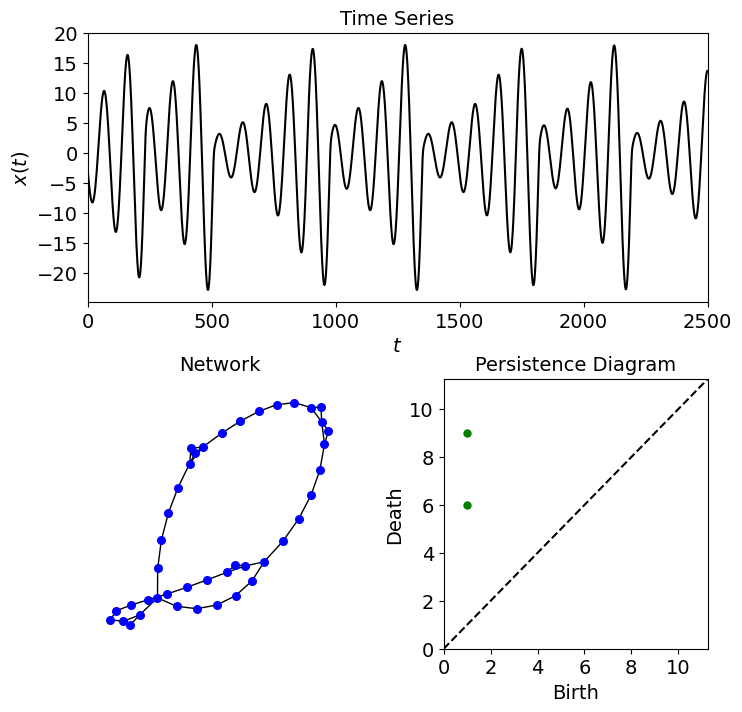

In [77]:
drawNetworkExamples(ts,G,diagram)

1-D Persistent Homology (loops): 
 [[1. 9.]
 [1. 6.]]


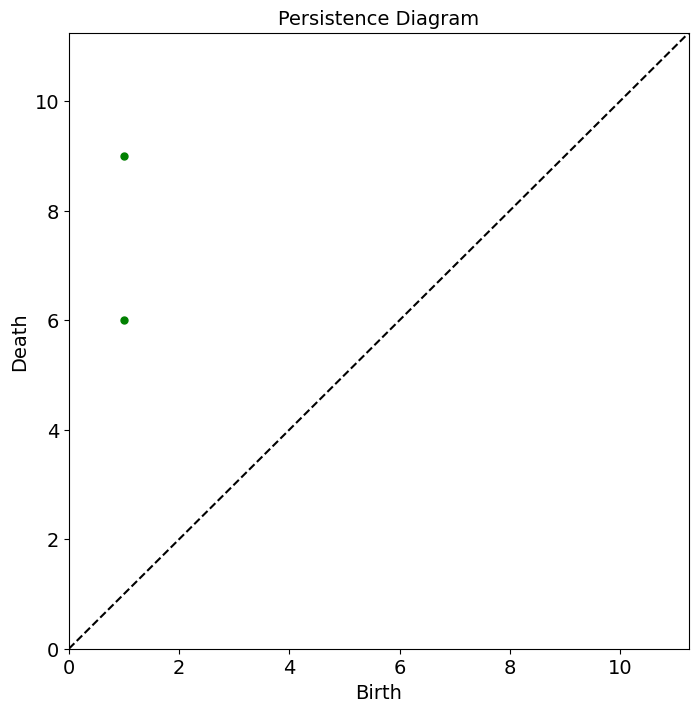

In [78]:
print('1-D Persistent Homology (loops): \n', diagram[1]) # Uncomment me!
drawThisDiagram(diagram)

In [79]:
#make three example point cloud
r = 1
R = 2
P1 = makePtCloud.Annulus(N=200, r=r, R=R,seed=None) #teaspoon data generation
P2 = makePtCloud.Annulus(N=200,r=r,R=R,seed=None)
P2[:,1]+=6
P3 = DoubleAnnulus()
P3 *= 1.1
P3[:,0]+=6
P3[:,1]+=3

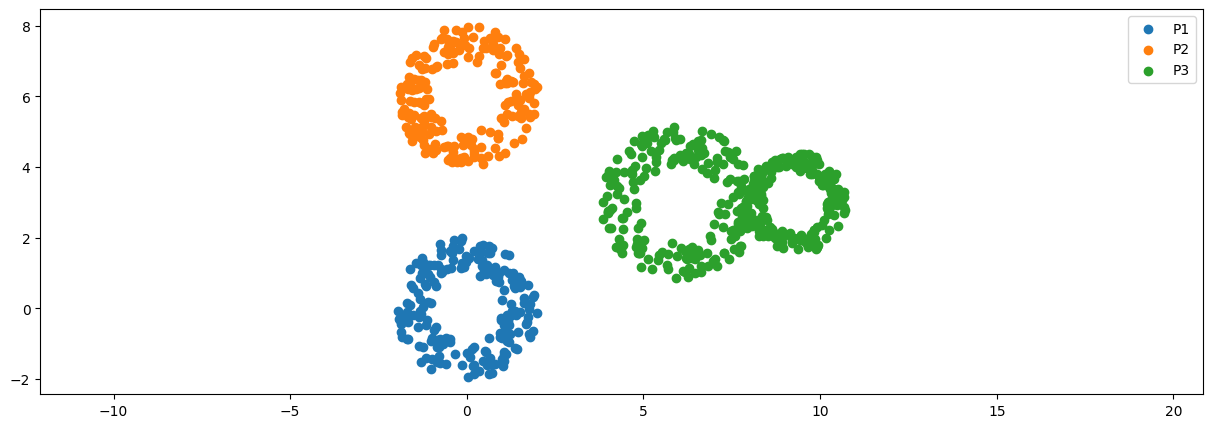

In [80]:
plt.figure(figsize=(15,5))
plt.scatter(P1[:,0],P1[:,1],label='P1')
plt.scatter(P2[:,0],P2[:,1],label = 'P2')
plt.scatter(P3[:,0],P3[:,1],label = 'P3')
plt.axis('equal')
plt.legend()

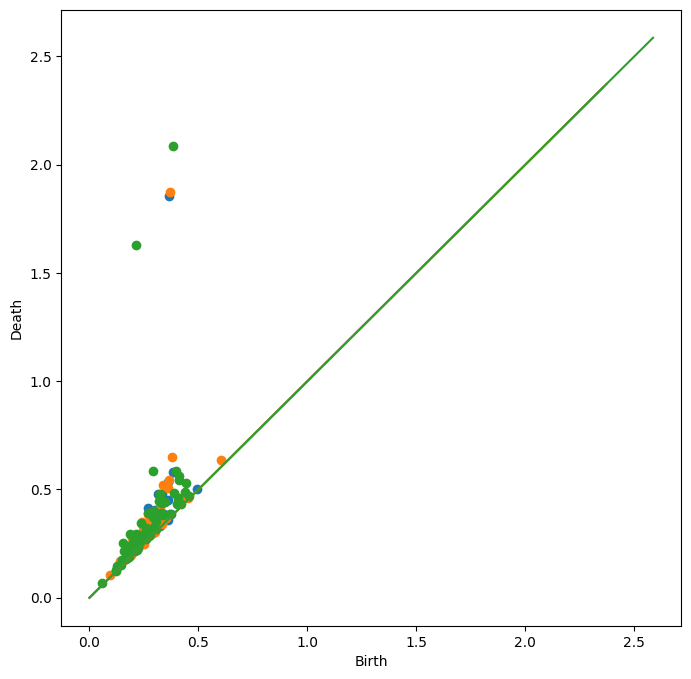

In [90]:
#computer their diagrams
diagrams1 = ripser.ripser(P1)['dgms']
diagrams2 = ripser.ripser(P2)['dgms']
diagrams3 = ripser.ripser(P3)['dgms']

Draw.drawDgm(diagrams1[1])
Draw.drawDgm(diagrams2[1])
Draw.drawDgm(diagrams3[1])

The bottleneck distance is 0.06837499141693115


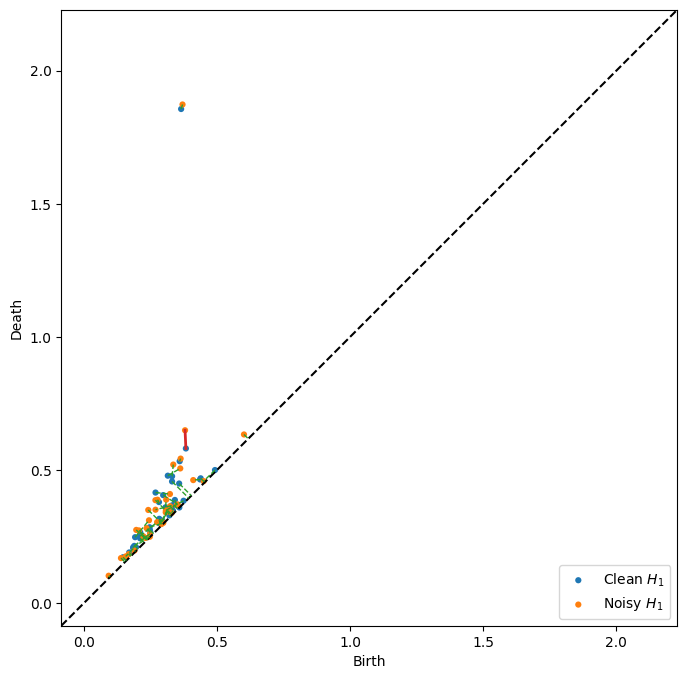

In [93]:
# Compute bottleneck distance using scikit-tda
distance_bottleneck, (matching) = persim.bottleneck(diagrams1[1],diagrams2[1], matching=True)
persim.visuals.bottleneck_matching(diagrams1[1], diagrams2[1], matching, labels=['Clean $H_1$', 'Noisy $H_1$'])
print('The bottleneck distance is', distance_bottleneck)
# print(matching)
# print(D)

The bottleneck distance is 0.708696149289608


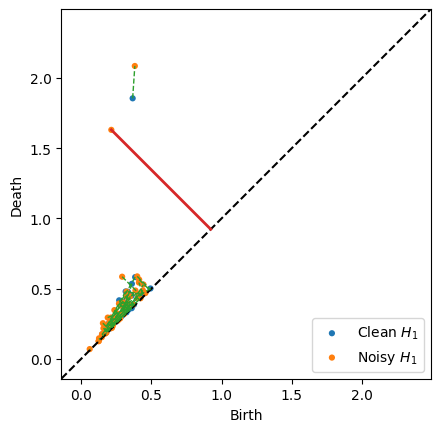

In [95]:
#compute bottleneck of P1 and P3
distance_bottleneck, (matching) = persim.bottleneck(diagrams1[1],diagrams3[1], matching=True)
persim.visuals.bottleneck_matching(diagrams1[1], diagrams3[1], matching,labels=['Clean $H_1$', 'Noisy $H_1$'])
print('The bottleneck distance is', distance_bottleneck)